# Trabajo Práctico 1
## Alumnos
Aguirregaray, Mauro
Denardi, Fabricio

## Cohorte
15-2024

###  Consideraciones generales
1. Siempre que lo consideramos necesario, realizamos un tipado de las funciones como una explicación detallada.
2. Intentamos nomenclar siempre en inglés variables, métodos, clases etc, aunque para un mejor entendimiento los comentarios los hicimos en español.


In [2]:
%matplotlib  inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
import os

In [3]:
img1_tp_path = 'img1_tp.png'
img2_tp_path = 'img2_tp.png'
segmentacion_path = 'segmentacion.png'

In [4]:
def get_file_names(dir:str) -> list:
    '''
    Devuelve la lista de archivos (nombres) de un directorio dado incluyendo el path
    '''
    file_dir = os.listdir(dir)
    
    files = [os.path.join(dir, file) for file in file_dir if os.path.isfile(os.path.join(dir, file))]
    return files

# Parte 1 (imágenes en /white_patch y /coord_cromaticas)

## 1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

## 2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

## 3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

In [85]:
def convert_to_chromatict_cords(img_to_process:np.ndarray)->np.ndarray:
    '''
    Aplica coordenadas crómaticas a la imagen dada como parámetro.
    '''

    #Convierto para evitar problemas aritméticos
    img = img_to_process.astype(np.float32)
    
    # Calcular la suma de los valores de los canales R, G y B
    channel_sum = np.sum(img, axis=2, keepdims=True)
    
    # Crear una máscara para los píxeles con suma 0
    zero_mask = channel_sum == 0
    
    # Evitar la división por cero reemplazando los ceros en la suma con unos (no afecta el resultado porque estos serán 0)
    channel_sum = np.where(zero_mask, 1, channel_sum)
    
    
    return  img / channel_sum
    


In [88]:
def white_patch_algorithm(img_to_process:np.ndarray)->np.ndarray:
    '''
    Aplica el algorítmo de white patch a la imagen dada
    '''
    #Convierto para evitar problemas aritméticos
    img = img_to_process.astype(np.float32)
    
    # Encontrar el valor máximo en cada canal
    channels_max = np.max(img, axis=(0, 1), keepdims=True)
    
    # Normalizar la imagen dividiendo por los valores máximos respectivos
    norm_img = img / channels_max
    
    # Asegurarse de que los valores estén en el rango [0, 1]
    norm_img = np.clip(norm_img, 0, 255)
    
    return norm_img


Imagen coord_cromaticas/CoordCrom_1.png
Imagen original


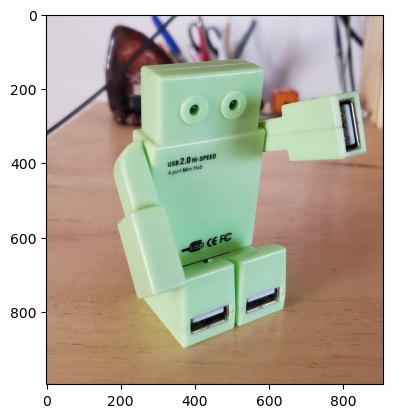

Imagen coordenadas cromáticas


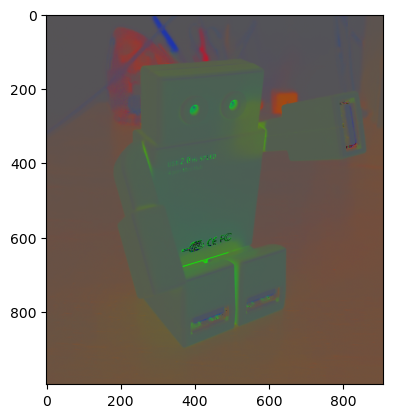

Imagen aplicando white patch


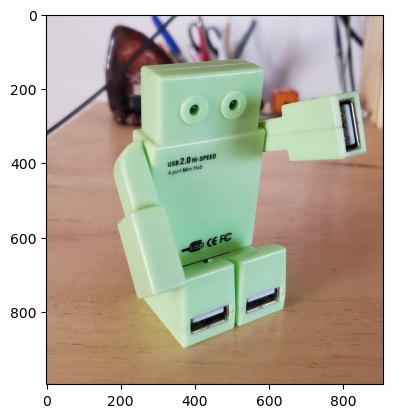

Imagen coord_cromaticas/CoordCrom_2.png
Imagen original


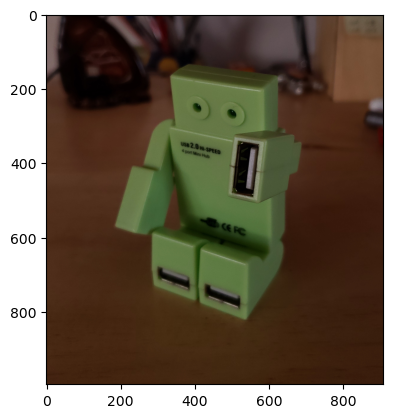

Imagen coordenadas cromáticas


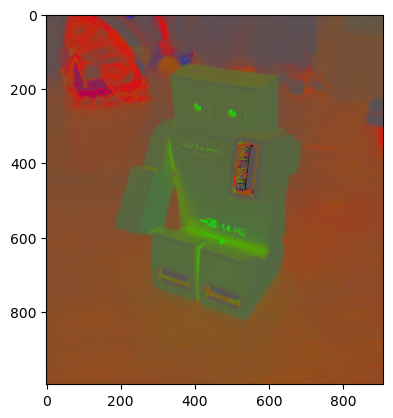

Imagen aplicando white patch


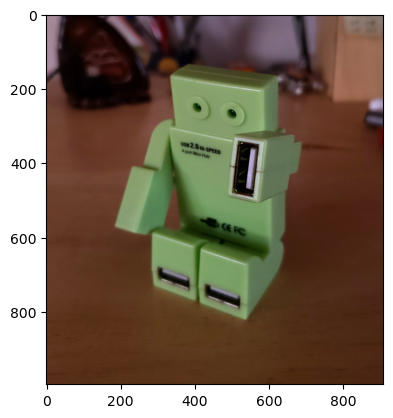

Imagen coord_cromaticas/CoordCrom_3.png
Imagen original


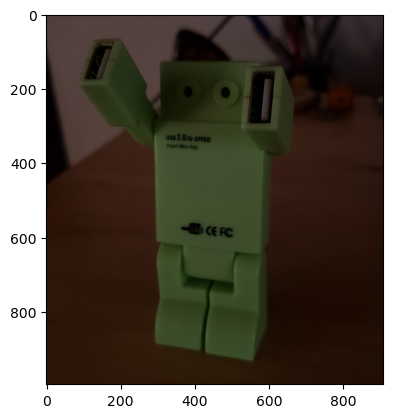

Imagen coordenadas cromáticas


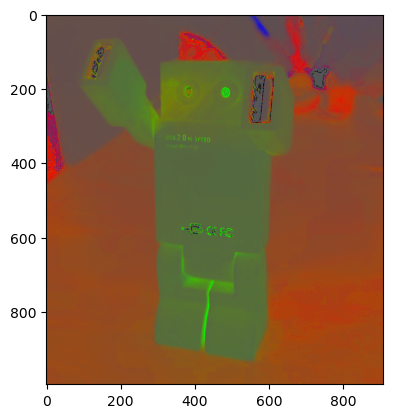

Imagen aplicando white patch


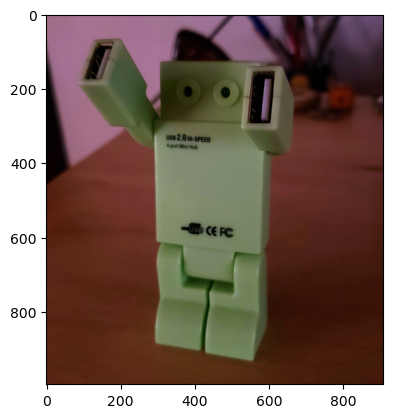

In [89]:
for file in get_file_names('coord_cromaticas'):
    img = cv.imread(file)
    img_ccc = convert_to_chromatict_cords(img)
    img_wp = white_patch_algorithm(img)

    print (f"Imagen {file}")

    print ("Imagen original")
    imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(imgRGB)
    plt.show()

    print ("Imagen coordenadas cromáticas")
    imgRGB = cv.cvtColor(img_ccc, cv.COLOR_BGR2RGB)
    plt.figure(3)
    plt.imshow(imgRGB)
    plt.show()

    print ("Imagen aplicando white patch")
    imgRGB = cv.cvtColor(img_wp, cv.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(imgRGB)
    plt.show()

## Conclusiones
Respecto a los problemas y limitaciones que tenemos podemos decir que:

### Coordenadas cromáticas
1. DAdo que es píxel a píxel puede darse el caso que la suma de R,G,B de cero (píxel anulado). Es por eso que utilizamos el np.where

### White Patch
1. Si el máximo en cada canal es 255 el numerador y denominador se me cancelar y queda igual a la imagen original. Esto es probable que ocurra y haría que esté realizando un gasto computacional sin ningun beneficio.

2. Algo que es poco probable que ocurra, pero es un problema en fin, es que el denominador sea 0, lo que significaría que el canal esté totalmente anulado (el máximo de toda la imagen es 0) y sería un problema potencial del input a resolver.

# Parte 2

## 1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grises y visualizarlas.

## 2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. 
Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, 
considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

In [8]:
def get_hist (img_to_process:np.ndarray, bins:int=256) -> np.ndarray:
    '''
    Crea el histograma 
    '''    
    hist,bins_edges = np.histogram(img_to_process.ravel(), bins=bins, range=[0, 256])

    # Calcular la posición central de cada barra
    bin_centers = (bins_edges[:-1] + bins_edges[1:]) / 2
    
    # Calcular el ancho de las barras
    
    width = np.diff(bins_edges)
                     

    return hist,bins_edges,bin_centers,width

img1_tp.png


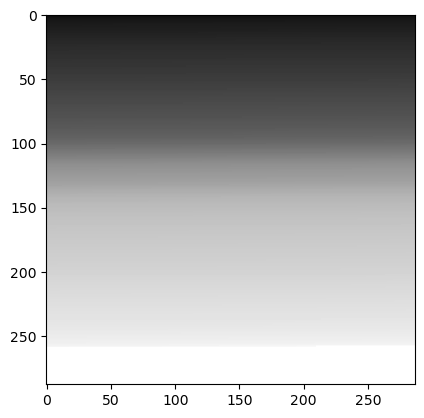

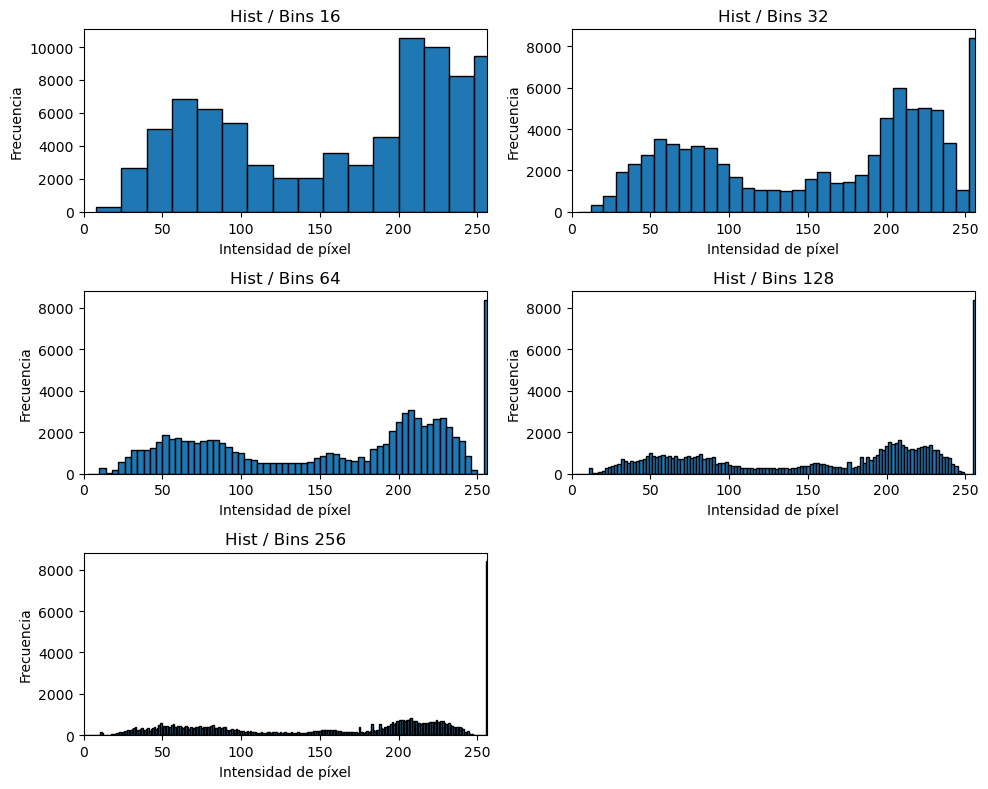

img2_tp.png


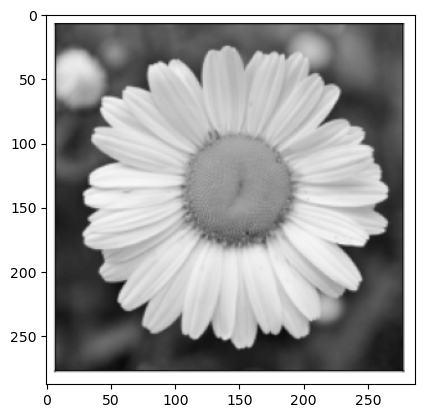

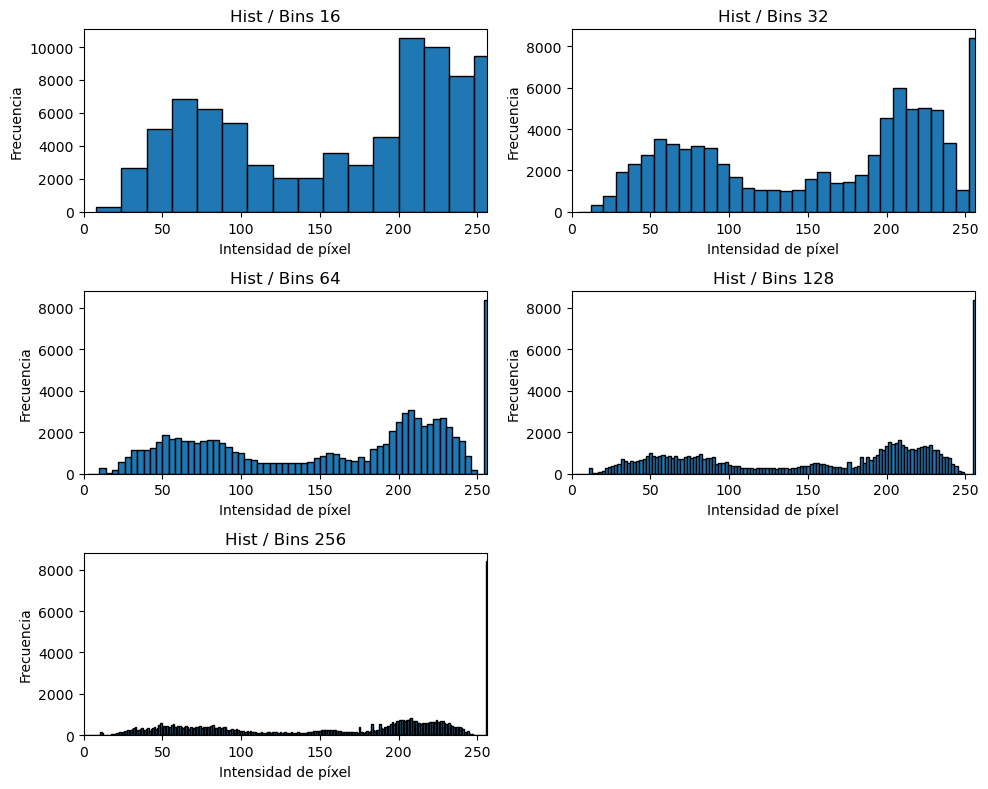

In [9]:
img_list = ['img1_tp.png','img2_tp.png']
bins_test = [16,32,64,128,256]
for img_name in img_list:
    print (img_name)
    img = cv.imread(img_name, cv.IMREAD_GRAYSCALE)
    fig = plt.figure()
    plt.imshow(img, cmap='gray')
    plt.show()
    
    fig = plt.figure(figsize=(10, 8))

    for ix,bins in enumerate(bins_test):
        hist,bins_edges,bin_centers,_width =get_hist(img,bins)

        plt.subplot(3, 2, ix + 1)  # Crear subtrama
        plt.bar(bin_centers, hist, width=_width,  align='edge', edgecolor='black')  # Graficar el histograma con barras
   
        #plt.plot(hist)  # Graficar el histograma
        plt.title(f'Hist / Bins {bins}')
        plt.xlabel('Intensidad de píxel')
        plt.ylabel('Frecuencia')
        plt.xlim([bins_edges[0], bins_edges[-1]])
    
    plt.tight_layout()
    plt.show()



## Conclusiones
1. Ambas imagenes, a pesar de ser diferentes en cuanto a lo que muestran (un degreadé vs una margarita) tienen una misma -o muy similar- distribución en sus histogramas

2. Los histogramas presentan una distrubición bimodal, aunque hay una saturación de blancos marcada.

3. Los bins adecuados, parecieran ser 64

4. Respecto a si pueden ser considerados como un feature, la respuesta es sí, por los siguientes motivos:
- Son invariantes a la posición/orientación
- Me dan un descriptor compacto, sencillo, representativo y de fácil lectura
- Son sencillos de calcular
- Puedo obtener una reducción de la dimensionalidad
- Vale aclarar que no deberían ser el único feature, dado que, como vemos en este caso, un simple degradé tiene el mismo histograma que una flor, que podría estar siendo en realidad nuestro objeto de análisis. Por otro lado, el degradé nos podría ayudar como una especie de hash o representación de la imagen.

## 3. Para la imagen segmentacion.png analice el histograma de los canales RGB. 

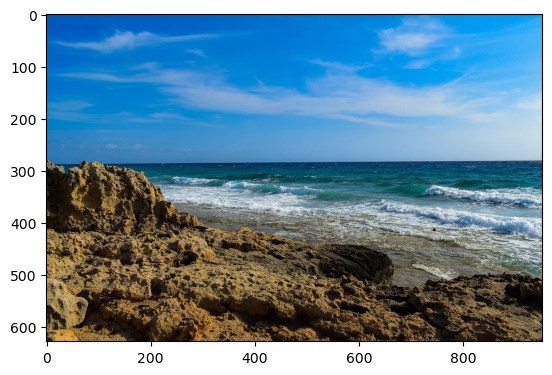

In [10]:
img_segmentacion = cv.imread(segmentacion_path)

img_segmentacion_RGB = cv.cvtColor(img_segmentacion, cv.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img_segmentacion_RGB)
plt.show()



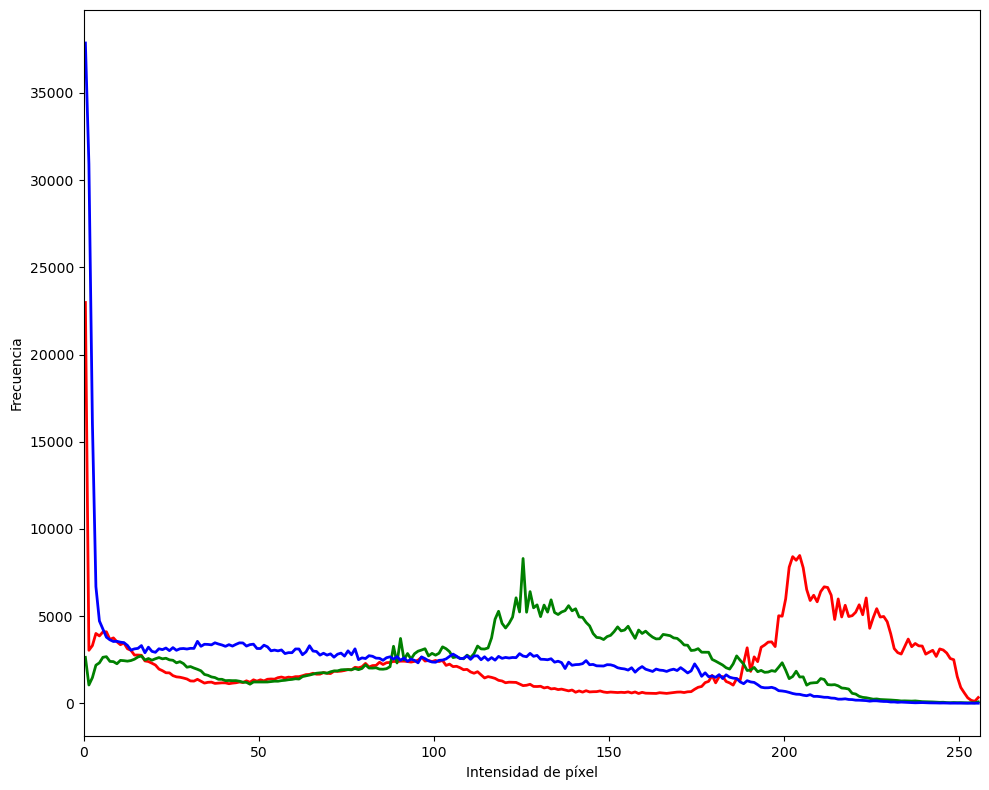

In [11]:
channels = {'r':0,'g':1,'b':2}

fig = plt.figure(figsize=(10, 8))
for k,v in channels.items():
    img_channel = img_segmentacion[:, :, v].flatten()

    hist,bins_edges,bin_centers,_width =get_hist(img_channel,bins)

    plt.plot(bin_centers, hist, color=k, linewidth=2)

    plt.xlabel('Intensidad de píxel')
    plt.ylabel('Frecuencia')
    plt.xlim([0, 256])

plt.tight_layout()
plt.show()

## Conclusiones
1. Tiene un buen rango dinámico
2. 

### Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas

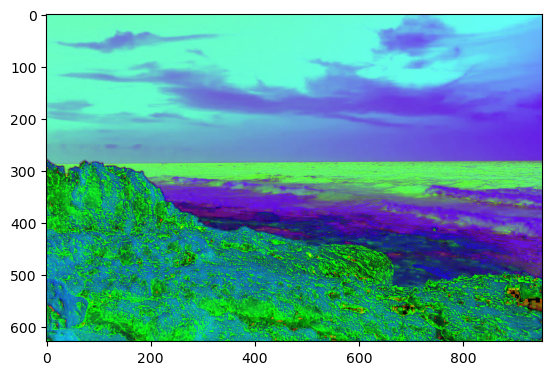

In [12]:
img_segmentacion_HSV = cv.cvtColor(img_segmentacion, cv.COLOR_BGR2HSV)
plt.figure()
plt.imshow(img_segmentacion_HSV)



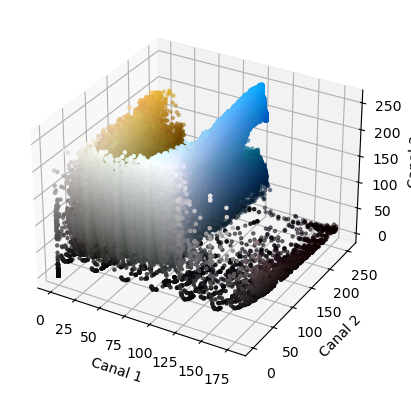

In [13]:
c1, c2, c3 = cv.split(img_segmentacion_HSV)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = img_segmentacion_RGB.reshape((np.shape(img_segmentacion_RGB)[0]*np.shape(img_segmentacion_RGB)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(c1.flatten(), c2.flatten(), c3.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Canal 1")
axis.set_ylabel("Canal 2")
axis.set_zlabel("Canal 3")
plt.show()

In [96]:
def get_region(region_name:str, img_HSV:np.ndarray, img_RGB:np.ndarray, region:list, sigma:int=3 ):
    print (f"Nombre de la región: {region_name}")
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 10))

    axs[0].imshow(img_RGB)
    axs[0].set_title('Original')
    axs[0].axis('off')


    x1,x2,y1,y2 = region[0],region[1],region[2],region[3]
    img_region = img_RGB[y1:y2,x1:x2,:]
    
    
   
    img_muestra_hsv = img_HSV[y1:y2,x1:x2,:]

    h, s, v = cv.split(img_muestra_hsv)
    color_mean, color_std = cv.meanStdDev(h)
    
    s_mean, s_std = cv.meanStdDev(s)
    v_mean, v_std = cv.meanStdDev(v)


    color_l = (int(color_mean[0][0] - sigma[0] * color_std[0][0]),int(s_mean[0][0] - sigma[1] * s_std[0][0]),int(v_mean[0][0]- sigma[2] * v_std[0][0]))
    color_u = (int(color_mean[0][0] + sigma[0] * color_std[0][0]),int(s_mean[0][0] + sigma[1] * s_std[0][0]),int(v_mean[0][0] + sigma[2] * v_std[0][0]))

    mask = cv.inRange(img_HSV, color_l,  color_u)
    img_segmentada = cv.bitwise_and(img_RGB, img_RGB, mask=mask)

    axs[1].imshow(img_segmentada)
    axs[1].set_title(region_name)
    axs[1].axis('off')

    axs[2].imshow(img_region)
    axs[2].set_title('Región')
    axs[2].axis('off')


    plt.tight_layout()
    plt.show()




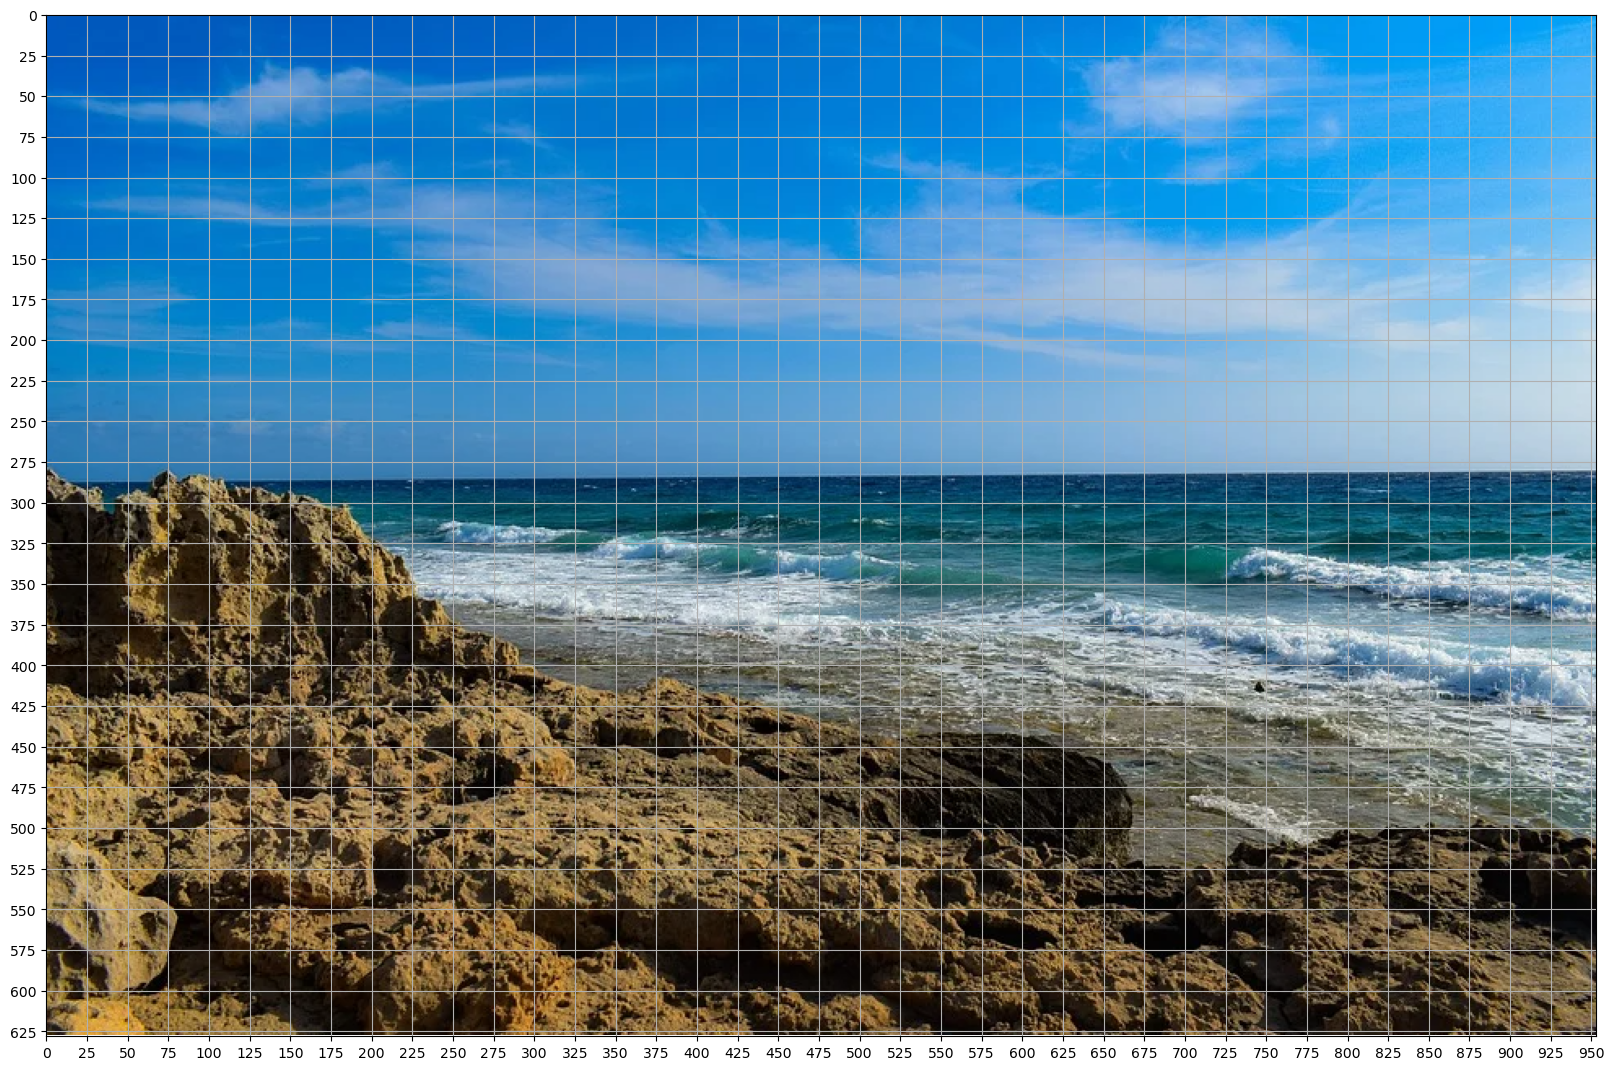

In [97]:
#Imprimir la imagen otra vez para tener la imagen con coordenadas e ir jugando con los x e y
plt.figure(figsize=(20, 16))
plt.imshow(img_segmentacion_RGB)
plt.grid(True)

plt.xticks(range(0, img_segmentacion_RGB.shape[1], 25))

plt.yticks(range(0, img_segmentacion_RGB.shape[0], 25))

# Ajustar los límites de los ejes para que coincidan con la imagen
plt.xlim(0, img_segmentacion_RGB.shape[1])
plt.ylim(img_segmentacion_RGB.shape[0], 0)  # Invertir el eje y para que el origen (0,0) esté en la esquina superior izquierda



plt.show()

Nombre de la región: Cielo


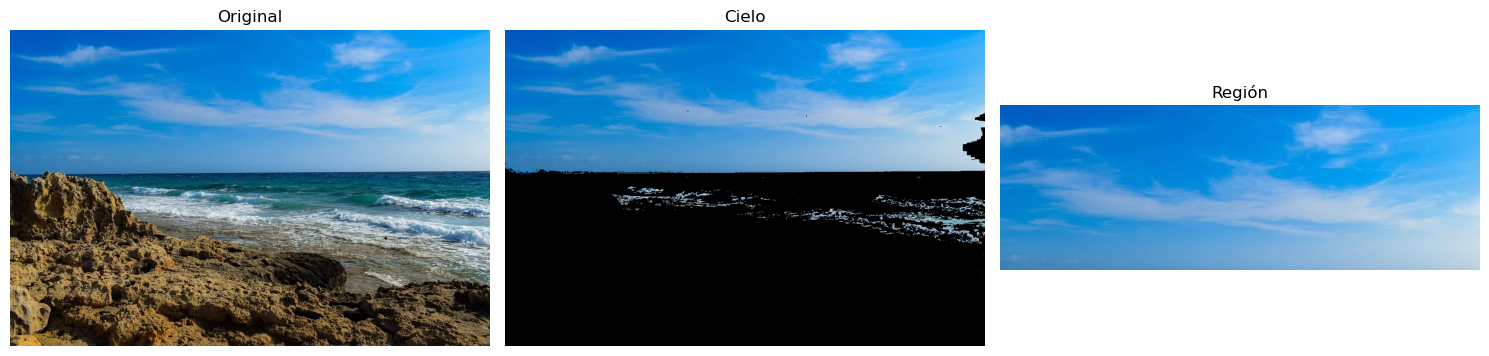

Nombre de la región: Agua


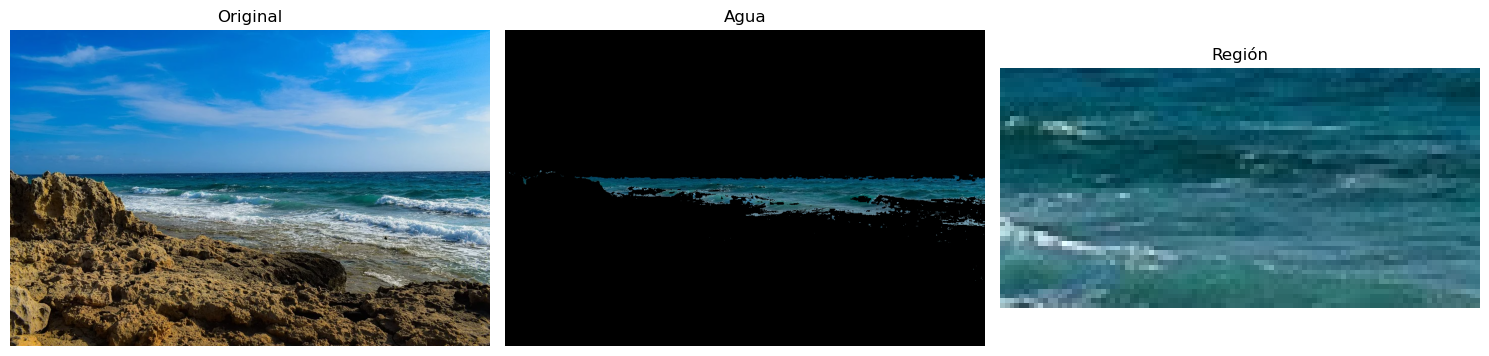

Nombre de la región: Tierra


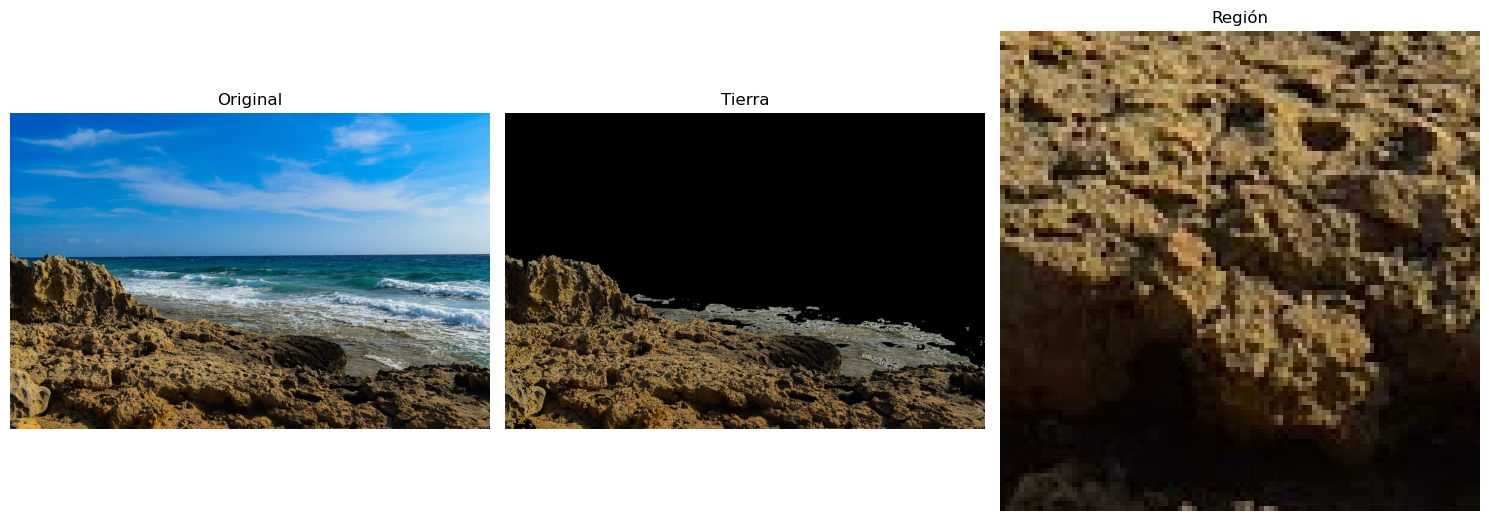

In [127]:
#Coords ->  X1,x2, Y1, Y2 en Fil - Col
#regions = {'Cielo':([0,950,0,275],3),'Agua':([500,600,300,350],2),'Tierra':([400,500,500,600],3)}
regions = {'Cielo':([150,950,0,275],[3,2,3]),'Agua':([500,600,300,350],[2,2,3]),'Tierra':([400,500,500,600],[3,3,2])}

for region, coords in regions.items():
    get_region(region,img_segmentacion_HSV, img_segmentacion_RGB, coords[0],coords[1])

## Conclusiones
1. La tierra es la región más fácil de segmentar.
2. SI bien pudimos realizar una división entre cielo y agua parcial, el principal problema estuvo en la separación de las nubes con las olas.
3. Ajustando algunos "Parámteros" fuimos logrando la mencionada segmentación, aunque pensamos que esto generaría un claro overfitting en un ambiente productivo.